<a href="https://colab.research.google.com/github/mjahanshahi/intermediate-nlp/blob/master/embeddings/Extracting%20Insights%20from%20Text%20Data%20Using%20NLP%20and%20Word%20Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Embeddings

## Generating Embeddings

### Preprocessing the Corpus

In [587]:
import gensim 
from gensim.test.utils import datapath
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logging
logging.basicConfig(level=logging.INFO)

In [588]:
DATASET_LINK = "https://raw.githubusercontent.com/AFAgarap/ecommerce-reviews-analysis/master/Womens%20Clothing%20E-Commerce%20Reviews.csv"
df = pd.read_csv(DATASET_LINK, index_col = 0, usecols=["Clothing ID", "Title", "Review Text", "Rating"])
df.shape

(23486, 3)

In [591]:
df.head()

,Title,Review Text,Rating
0,Some major design flaws,I had such high hopes for this dress and reall...,3
1,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5
2,Flattering shirt,This shirt is very flattering to all due to th...,5
3,Not for the very petite,"I love tracy reese dresses, but this one is no...",2
4,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5


In [590]:
# Lets remove any review without a text review or a rating
df.dropna(how = "any", subset=['Title', 'Review Text', 'Rating'], inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(19675, 3)

In [592]:
def preprocess_corpus(corpus):
  for i, document in enumerate(corpus):
    if (i % 10000 == 0):
      logging.info("Read {0} Docs".format(i))
    yield gensim.utils.tokenize(document, lowercase=True, deacc=True)

In [627]:
tokenized_docs = list(preprocess_docs(df["Review Text"]))

INFO:root:Read 0 Reviews
INFO:root:Read 10000 Reviews


### Training Two Word Embeddings Models

In [628]:

model_50d = gensim.models.Word2Vec(tokenized_docs, size=50, min_count = 5, workers=4, sg=1)
model_50d.train(tokenized_docs, total_examples=len(tokenized_docs), epochs=10)

model_200d = gensim.models.Word2Vec(tokenized_docs, size=200, min_count = 5, workers=4, sg=1)
model_200d.train(tokenized_docs, total_examples=len(tokenized_docs), epochs=10)

INFO:gensim.models.word2vec:collecting all words and their counts
INFO:gensim.models.word2vec:PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO:gensim.models.word2vec:PROGRESS: at sentence #10000, processed 558962 words, keeping 9727 word types
INFO:gensim.models.word2vec:collected 13027 word types from a corpus of 1108396 raw words and 19675 sentences
INFO:gensim.models.word2vec:Loading a fresh vocabulary
INFO:gensim.models.word2vec:effective_min_count=5 retains 4567 unique words (35% of original 13027, drops 8460)
INFO:gensim.models.word2vec:effective_min_count=5 leaves 1094854 word corpus (98% of original 1108396, drops 13542)
INFO:gensim.models.word2vec:deleting the raw counts dictionary of 13027 items
INFO:gensim.models.word2vec:sample=0.001 downsamples 60 most-common words
INFO:gensim.models.word2vec:downsampling leaves estimated 766434 word corpus (70.0% of prior 1094854)
INFO:gensim.models.base_any2vec:estimated required memory for 4567 words and 200 dimens

(7663843, 11083960)

### Exploring the Embeddings

In [597]:
model_200d.wv.most_similar("yellow")

INFO:gensim.models.keyedvectors:precomputing L2-norms of word weight vectors


[('salmon', 0.6493200063705444),
 ('goldenrod', 0.6292126774787903),
 ('marigold', 0.628402054309845),
 ('muddy', 0.6243737936019897),
 ('apricot', 0.6200439929962158),
 ('undertones', 0.6171101927757263),
 ('seersucker', 0.6148114204406738),
 ('emerald', 0.6146565079689026),
 ('dusty', 0.6134930849075317),
 ('greenish', 0.6122481822967529)]

In [598]:
model_50d.wv.most_similar("yellow")

INFO:gensim.models.keyedvectors:precomputing L2-norms of word weight vectors


[('red', 0.8963728547096252),
 ('purple', 0.8911267518997192),
 ('orange', 0.8824447989463806),
 ('pink', 0.8754276037216187),
 ('salmon', 0.8725737929344177),
 ('green', 0.8654224276542664),
 ('teal', 0.8437644839286804),
 ('blue', 0.841431736946106),
 ('emerald', 0.8406636118888855),
 ('undertones', 0.839013934135437)]

In [599]:
model_200d.wv.most_similar("flattering")

[('flatering', 0.5308620929718018),
 ('flatteringly', 0.5248962640762329),
 ('complimentary', 0.5248880386352539),
 ('forgiving', 0.5186333060264587),
 ('decently', 0.5137904286384583),
 ('clever', 0.5036065578460693),
 ('formfitting', 0.5010722279548645),
 ('attractive', 0.4937928318977356),
 ('magnificent', 0.4925890564918518),
 ('distinctive', 0.4920140504837036)]

In [600]:
model_50d.wv.most_similar("flattering")

[('forgiving', 0.8156605362892151),
 ('slimming', 0.8040887117385864),
 ('comfortable', 0.7720515727996826),
 ('decently', 0.7327044606208801),
 ('attractive', 0.7325081825256348),
 ('flatering', 0.7131739258766174),
 ('accentuates', 0.7098397016525269),
 ('curvy', 0.7049664855003357),
 ('flowy', 0.7027915716171265),
 ('utterly', 0.6956693530082703)]

In [601]:
model_200d.wv.most_similar("jeans")

[('crops', 0.5943806767463684),
 ('capris', 0.5863674879074097),
 ('loafers', 0.5770070552825928),
 ('sandles', 0.5743732452392578),
 ('skinnys', 0.5713096857070923),
 ('cords', 0.5674057006835938),
 ('jeggings', 0.5656487345695496),
 ('skinny', 0.5649229288101196),
 ('leggings', 0.5604121685028076),
 ('offs', 0.5599068403244019)]

In [602]:
model_50d.wv.most_similar("jeans")

[('leggings', 0.8748232126235962),
 ('shorts', 0.8690977692604065),
 ('skinny', 0.8587411642074585),
 ('crops', 0.8538892269134521),
 ('pants', 0.8441354632377625),
 ('capris', 0.8347073793411255),
 ('loafers', 0.8291671276092529),
 ('jean', 0.8243778347969055),
 ('offs', 0.808951199054718),
 ('cords', 0.805557131767273)]

In [603]:
model_200d.wv.most_similar("cheap")

[('flimsy', 0.5623683929443359),
 ('coarse', 0.5599557757377625),
 ('synthetic', 0.5538432002067566),
 ('cheaply', 0.5253739356994629),
 ('halloween', 0.5146256685256958),
 ('acrylic', 0.5130155086517334),
 ('lacking', 0.5125691890716553),
 ('reminding', 0.503762423992157),
 ('shabby', 0.49939191341400146),
 ('scratchy', 0.4991796910762787)]

In [604]:
model_50d.wv.most_similar("cheap")

[('flimsy', 0.7870427966117859),
 ('polyester', 0.761796236038208),
 ('stiff', 0.7277495861053467),
 ('coarse', 0.7169432044029236),
 ('scratchy', 0.7138239145278931),
 ('cheaply', 0.7122425436973572),
 ('horrible', 0.697981595993042),
 ('lacking', 0.6917958855628967),
 ('canvas', 0.6860473155975342),
 ('expensive', 0.685718297958374)]

In [605]:
model_200d.wv.similarity(w1="flattering",w2="slimming")

0.47040746

In [606]:
model_200d.wv.similarity(w1="flattering",w2="ugly")

0.131902

In [607]:
model_50d.wv.similarity(w1="flattering",w2="slimming")

0.8040888

In [608]:
model_50d.wv.similarity(w1="flattering",w2="ugly")

0.30736533

In [609]:
model_50d.wv.doesnt_match(['pants', 'jeans', 'boots', 'leggings', 'capris'])

/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.



'boots'

In [610]:
model_200d.wv.doesnt_match(['pants', 'jeans', 'boots', 'leggings', 'capris'])

/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.



'boots'


### Saving the Embeddings


In [611]:
model_200d.save("word2vec_200d_fashion_reviews.model")
model_50d.save("word2vec_50d_fashion_reviews.model")

INFO:gensim.utils:saving Word2Vec object under word2vec_200d_fashion_reviews.model, separately None
INFO:gensim.utils:not storing attribute vectors_norm
INFO:gensim.utils:not storing attribute cum_table
INFO:gensim.utils:saved word2vec_200d_fashion_reviews.model
INFO:gensim.utils:saving Word2Vec object under word2vec_50d_fashion_reviews.model, separately None
INFO:gensim.utils:not storing attribute vectors_norm
INFO:gensim.utils:not storing attribute cum_table
INFO:gensim.utils:saved word2vec_50d_fashion_reviews.model


In [612]:
model = Word2Vec.load("word2vec_50d_fashion_reviews.model")
#model.train(more_tokenized_documents, total_examples=len(more_tokenized_documents), epochs = 1)

INFO:gensim.utils:loading Word2Vec object from word2vec_50d_fashion_reviews.model
INFO:gensim.utils:loading wv recursively from word2vec_50d_fashion_reviews.model.wv.* with mmap=None
INFO:gensim.utils:setting ignored attribute vectors_norm to None
INFO:gensim.utils:loading vocabulary recursively from word2vec_50d_fashion_reviews.model.vocabulary.* with mmap=None
INFO:gensim.utils:loading trainables recursively from word2vec_50d_fashion_reviews.model.trainables.* with mmap=None
INFO:gensim.utils:setting ignored attribute cum_table to None
INFO:gensim.utils:loaded word2vec_50d_fashion_reviews.model


NameError: ignored

The trained word vectors are stored in a KeyedVectors instance

In [613]:
model_50d.wv["flattering"]

array([-0.13577017, -0.48372188, -0.18726906,  0.0307007 , -0.2076778 ,
       -0.18160263, -0.1471039 ,  0.18827346, -0.43903643,  0.09426805,
        0.03142299, -0.5600759 ,  0.02118284,  0.14588787, -0.3523213 ,
       -0.06098642,  0.12196065,  0.2999971 ,  0.53273463, -0.01998848,
       -0.17410867, -0.6053339 ,  0.43180224, -0.30960622, -0.01318047,
        0.14520001, -0.16228531,  0.02638513,  0.00987799,  0.05070274,
        0.16106422, -0.7422603 ,  0.25432575,  0.2618106 ,  0.11677752,
       -0.07058707,  0.27464482, -0.24106057, -0.00872387,  0.08229857,
        0.01006806, -0.49521792, -0.09372171, -0.26528606,  0.6812198 ,
        0.23088707,  0.34178084,  0.13873395, -0.5398746 ,  0.18358727],
      dtype=float32)

[Storing a model as keyed vectors results in a much smaller and faster object that can be quickly loaded and easily shared.](https://radimrehurek.com/gensim/models/word2vec.html)

In [ ]:
from gensim.models import KeyedVectors

word_vectors = model_50d.wv
word_vectors.save("word2vec_50d_fashion_reviews.wordvectors")

## Evaluating Embedding Performance

[Link to SimLex](https://fh295.github.io//simlex.html)



### Loading Pretrained Embeddings

In [ ]:
import gensim.downloader

In [ ]:
twitter_vectors = gensim.downloader.load('glove-twitter-50')

INFO:gensim.models.utils_any2vec:loading projection weights from /root/gensim-data/glove-twitter-50/glove-twitter-50.gz
INFO:gensim.models.utils_any2vec:loaded (1193514, 50) matrix from /root/gensim-data/glove-twitter-50/glove-twitter-50.gz


In [ ]:
wiki_vectors = gensim.downloader.load('glove-wiki-gigaword-50')

[==================================================] 100.0% 66.0/66.0MB downloaded


INFO:gensim.api:glove-wiki-gigaword-50 downloaded
INFO:gensim.models.utils_any2vec:loading projection weights from /root/gensim-data/glove-wiki-gigaword-50/glove-wiki-gigaword-50.gz
INFO:gensim.models.utils_any2vec:loaded (400000, 50) matrix from /root/gensim-data/glove-wiki-gigaword-50/glove-wiki-gigaword-50.gz


### Quick and Dirty Evaluations

In [ ]:
twitter_vectors.most_similar('flattering')

INFO:gensim.models.keyedvectors:precomputing L2-norms of word weight vectors


[('deceiving', 0.7589634656906128),
 ('subtle', 0.731188178062439),
 ('degrading', 0.7235129475593567),
 ('revealing', 0.7195727229118347),
 ('intimidating', 0.7194300889968872),
 ('complement', 0.7180843353271484),
 ('hideous', 0.7109505534172058),
 ('misleading', 0.7089495658874512),
 ('appealing', 0.7067294716835022),
 ('endearing', 0.7048246264457703)]

In [ ]:
wiki_vectors.most_similar("flattering")

INFO:gensim.models.keyedvectors:precomputing L2-norms of word weight vectors


[('unflattering', 0.7839535474777222),
 ('understated', 0.7335059642791748),
 ('startlingly', 0.7195419669151306),
 ('strikingly', 0.7144407033920288),
 ('legible', 0.6908946633338928),
 ('pleasing', 0.6869217753410339),
 ('tasteful', 0.6848117113113403),
 ('nuanced', 0.6821258664131165),
 ('ironic', 0.6800380945205688),
 ('instructive', 0.6722054481506348)]

In [ ]:
twitter_vectors.most_similar('slimming')

[('skincare', 0.8081165552139282),
 ('whitening', 0.7969942092895508),
 ('enhancement', 0.7625880837440491),
 ('supplement', 0.7529165148735046),
 ('anti-aging', 0.7474892139434814),
 ('supplements', 0.7415367364883423),
 ('cosmetics', 0.7402847409248352),
 ('moisturizing', 0.7401215434074402),
 ('decay', 0.734142541885376),
 ('nourishing', 0.7283862829208374)]

In [ ]:
wiki_vectors.most_similar("slimming")

[('ecstacy', 0.7174867987632751),
 ('impotency', 0.7070642709732056),
 ('essences', 0.6937088966369629),
 ('shampoo', 0.6900542378425598),
 ('lotion', 0.6844039559364319),
 ('toning', 0.6772074699401855),
 ('sunsilk', 0.6712096929550171),
 ('lollipops', 0.6711376309394836),
 ('vaseline', 0.670579195022583),
 ('wipes', 0.6690594553947449)]

In [ ]:
wiki_vectors.doesnt_match(['pants', 'jeans', 'boots', 'leggings', 'capris'])

/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'capris'

In [ ]:
twitter_vectors.doesnt_match(['pants', 'jeans', 'boots', 'leggings', 'capris'])

/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'capris'

In [ ]:
model_50d.wv.doesnt_match(['pants', 'jeans', 'boots', 'leggings', 'capris'])

/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'boots'

### Systematic Testing

#### Generalized Testing

In [ ]:
wiki_vectors.evaluate_word_pairs(datapath('wordsim353.tsv'))

INFO:gensim.models.keyedvectors:Pearson correlation coefficient against /usr/local/lib/python3.6/dist-packages/gensim/test/test_data/wordsim353.tsv: 0.5066
INFO:gensim.models.keyedvectors:Spearman rank-order correlation coefficient against /usr/local/lib/python3.6/dist-packages/gensim/test/test_data/wordsim353.tsv: 0.5033
INFO:gensim.models.keyedvectors:Pairs with unknown words ratio: 0.0%


((0.5066191864084476, 2.0601625001388435e-24),
 SpearmanrResult(correlation=0.503319577396603, pvalue=4.545752555909452e-24),
 0.0)

In [ ]:
twitter_vectors.evaluate_word_pairs(datapath('wordsim353.tsv'))

INFO:gensim.models.keyedvectors:Pearson correlation coefficient against /usr/local/lib/python3.6/dist-packages/gensim/test/test_data/wordsim353.tsv: 0.4692
INFO:gensim.models.keyedvectors:Spearman rank-order correlation coefficient against /usr/local/lib/python3.6/dist-packages/gensim/test/test_data/wordsim353.tsv: 0.4604
INFO:gensim.models.keyedvectors:Pairs with unknown words ratio: 2.3%


((0.4691938177508138, 2.7469878583403077e-20),
 SpearmanrResult(correlation=0.460432602938833, pvalue=1.6621434759294624e-19),
 2.26628895184136)

In [614]:
model_50d.wv.evaluate_word_pairs(datapath('wordsim353.tsv'))

INFO:gensim.models.keyedvectors:Pearson correlation coefficient against /usr/local/lib/python3.6/dist-packages/gensim/test/test_data/wordsim353.tsv: 0.2453
INFO:gensim.models.keyedvectors:Spearman rank-order correlation coefficient against /usr/local/lib/python3.6/dist-packages/gensim/test/test_data/wordsim353.tsv: 0.1949
INFO:gensim.models.keyedvectors:Pairs with unknown words ratio: 74.2%


((0.24529610107550434, 0.0191010034001498),
 SpearmanrResult(correlation=0.19494461262633167, pvalue=0.0640611302591952),
 74.22096317280453)

#### Domain Specific Testing

In [ ]:
wiki_vectors.evaluate_word_pairs(pairs="wordsim_clothing.csv", delimiter = ",")

INFO:gensim.models.keyedvectors:Pearson correlation coefficient against wordsim_clothing.csv: 0.2953
INFO:gensim.models.keyedvectors:Spearman rank-order correlation coefficient against wordsim_clothing.csv: 0.2827
INFO:gensim.models.keyedvectors:Pairs with unknown words ratio: 0.0%


((0.29529311733612107, 0.04389440628678378),
 SpearmanrResult(correlation=0.2826504985805369, pvalue=0.05422539658292837),
 0.0)

In [ ]:
twitter_vectors.evaluate_word_pairs(pairs="wordsim_clothing.csv", delimiter = ",")

INFO:gensim.models.keyedvectors:Pearson correlation coefficient against wordsim_clothing.csv: 0.0920
INFO:gensim.models.keyedvectors:Spearman rank-order correlation coefficient against wordsim_clothing.csv: 0.0541
INFO:gensim.models.keyedvectors:Pairs with unknown words ratio: 2.1%


((0.0919804625667379, 0.5432110795290985),
 SpearmanrResult(correlation=0.05414279342976543, pvalue=0.7208143321976768),
 2.127659574468085)

In [615]:
model_50d.wv.evaluate_word_pairs(pairs="wordsim_clothing.csv", delimiter = ",")

INFO:gensim.models.keyedvectors:Pearson correlation coefficient against wordsim_clothing.csv: 0.5582
INFO:gensim.models.keyedvectors:Spearman rank-order correlation coefficient against wordsim_clothing.csv: 0.5451
INFO:gensim.models.keyedvectors:Pairs with unknown words ratio: 0.0%


((0.5581760539919435, 4.566850348382945e-05),
 SpearmanrResult(correlation=0.5451116758338926, pvalue=7.433493044043204e-05),
 0.0)

In [616]:
model_200d.wv.evaluate_word_pairs(pairs="wordsim_clothing.csv", delimiter = ",")

INFO:gensim.models.keyedvectors:Pearson correlation coefficient against wordsim_clothing.csv: 0.5480
INFO:gensim.models.keyedvectors:Spearman rank-order correlation coefficient against wordsim_clothing.csv: 0.5451
INFO:gensim.models.keyedvectors:Pairs with unknown words ratio: 0.0%


((0.5480375976566283, 6.676831270943942e-05),
 SpearmanrResult(correlation=0.5451116758338926, pvalue=7.433493044043204e-05),
 0.0)


### Visualizing Embeddings 


#### T-SNE

In [ ]:
from sklearn.decomposition import IncrementalPCA    # inital reduction
from sklearn.manifold import TSNE                   # final reduction

def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    # extract the words & their vectors, as numpy arrays
    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index2word)  # fixed-width numpy strings

    # reduce using t-SNE
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels

def plot_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random

    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 20)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))


In [ ]:
x_vals, y_vals, labels = reduce_dimensions(model_50d)

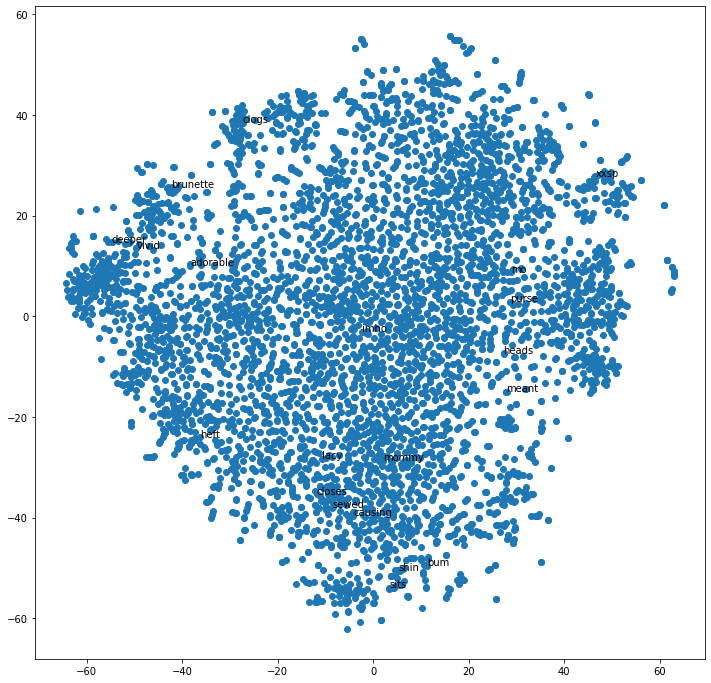

In [ ]:
plot_with_matplotlib(x_vals, y_vals, labels)

#### UMAP


In [618]:
import umap
embedding = umap.UMAP(random_state=50).fit_transform(model_50d.wv.vectors)

Text(0.5, 1.0, 'UMAP projection of the 50d Clothing Dataset')

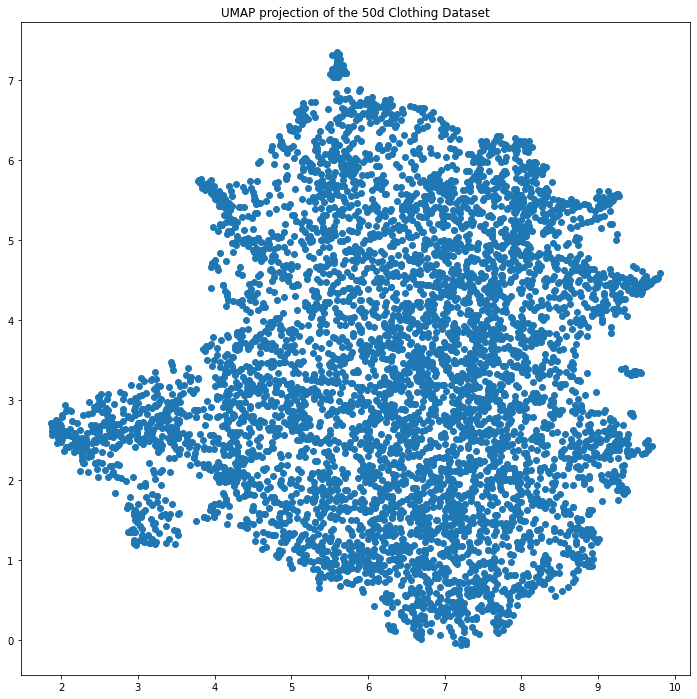

In [619]:
plt.figure(figsize=(12, 12))
plt.scatter(embedding[:, 0], embedding[:, 1])
plt.title('UMAP projection of the 50d Fashion Review Embedding')

Text(0.5, 1.0, 'UMAP projection of the 200d Clothing Dataset')

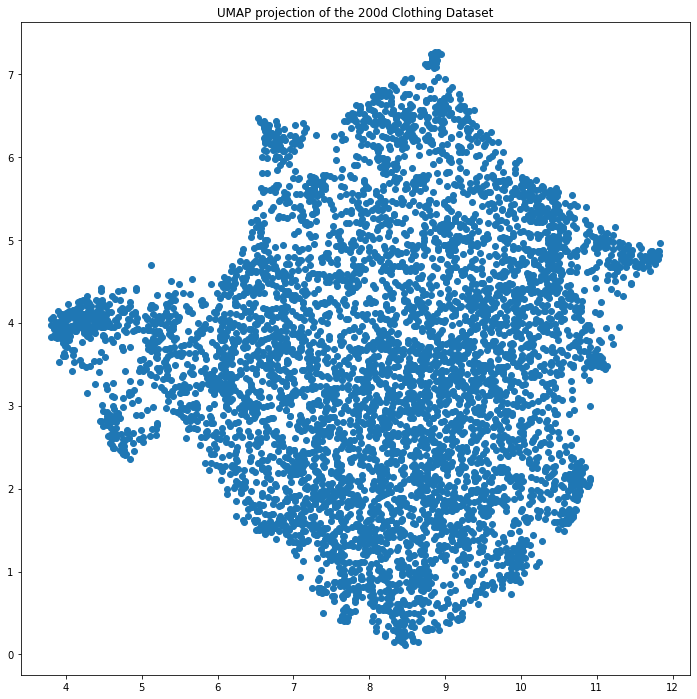

In [620]:
embedding = umap.UMAP(random_state=200).fit_transform(model_200d.wv.vectors)
plt.figure(figsize=(12, 12))
plt.scatter(embedding[:, 0], embedding[:, 1])
plt.title('UMAP projection of the 200d Fashion Review Embedding')

## Future Work: Optimizations to test
- Preprocessing: Does using a more complex tokenizer (i.e. spaCy) improve performance?
- Data: Does adding more data improve performance?
- Parameter Tuning: Does changing the window size / number of dimensions improve performance?
- Algorithm: Could a different implementation (CBOW / GloVE / PMI) improve performance?

## Using Embeddings as inputs to ML Models

### Generating the dataframe

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model

In [ ]:
df.sample(10)

,Title,Review Text,Rating,Sentiment
6984,Breathtakingly lovely,The pictures don't do this cardi justice. it's...,5,1
16801,Sheik and stylish,I saw a photographer wearing this at a wedding...,5,1
3708,Pretty,The colors on this are beautiful! i have wider...,4,1
8301,Perfect pj's!,I cannot say enough about these pajama pants. ...,5,1
21878,Huge,"This is a beautiful looking dress, but definit...",3,0
21266,Poor quality,"I bought this t-shirt in pink, blue, red, grey...",1,0
8465,Beautiful dress,Beautiful dress but i had to returned because ...,4,1
13137,Couldn't send it back fast enough!,"Unlike the other two reviews , i found this dr...",2,0
15999,Awesome top,I love this shirt! red + navy is one of my fav...,5,1
18529,"Pretty, delicate top",Cute top. definitely sheer so need an undershi...,4,1


In [ ]:
df["Rating"].value_counts()

5    12540
4     4908
3     2823
2     1549
1      821
Name: Rating, dtype: int64

In [629]:
df["Sentiment"] = pd.cut(df["Rating"], bins=2, labels=[0, 1])
df.head()

,Title,Review Text,Rating,Sentiment
0,Some major design flaws,I had such high hopes for this dress and reall...,3,0
1,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
2,Flattering shirt,This shirt is very flattering to all due to th...,5,1
3,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0
4,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1


In [622]:
train_data, test_data = train_test_split(df[["Title", "Sentiment"]], test_size=0.3, random_state=42)

### Generating the workflow


In [ ]:
def preprocess_document(document):
  return gensim.utils.tokenize(document, lowercase=True, deacc=True)
  
def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.vocab:
            mean.append(wv.syn0norm[wv.vocab[word].index])
            all_words.add(wv.vocab[word].index)

    if not mean:
        logging.warning("cannot compute similarity with no input %s", words)
        # FIXME: remove these examples in pre-processing
        return np.zeros(wv.vector_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, review) for review in text_list])

def evaluate_prediction(predictions, target, title="Confusion matrix"):
    print('accuracy %s' % accuracy_score(target, predictions))
    cm = confusion_matrix(target, predictions)
    print('confusion matrix\n %s' % cm)
    print('(row=expected, col=predicted)')
    
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plot_confusion_matrix(cm_normalized, title + ' Normalized')

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    target_names = ["Negative", "Positive"]
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def predict(vectorizer, classifier, data):
    data_features = vectorizer.transform(data['plot'])
    predictions = classifier.predict(data_features)
    target = data["Sentiment"]
    evaluate_prediction(predictions, target)

In [623]:
test_tokenized = test_data.apply(lambda x: list(preprocess_document(x['Title'])), axis=1).values
train_tokenized = train_data.apply(lambda x: list(preprocess_document(x['Title'])), axis=1).values

### Results

#### Custom Fashion Review Embedding

In [624]:
X_train_word_average_50d = word_averaging_list(model_50d.wv,train_tokenized)
X_test_word_average_50d = word_averaging_list(model_50d.wv,test_tokenized)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning:

Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.wv.vectors_norm instead).



accuracy 0.8729459596815179
confusion matrix
 [[ 989  374]
 [ 376 4164]]
(row=expected, col=predicted)


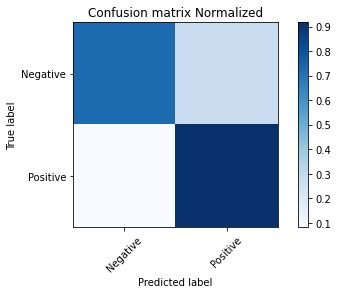

In [625]:
knn_naive = KNeighborsClassifier(n_neighbors=8, n_jobs=1, algorithm='brute', metric='cosine' )
knn_naive.fit(X_train_word_average_50d, train_data["Sentiment"])
predicted = knn_naive.predict(X_test_word_average_50d)
evaluate_prediction(predicted, test_data["Sentiment"])

accuracy 0.8597323394883958
confusion matrix
 [[ 849  514]
 [ 314 4226]]
(row=expected, col=predicted)


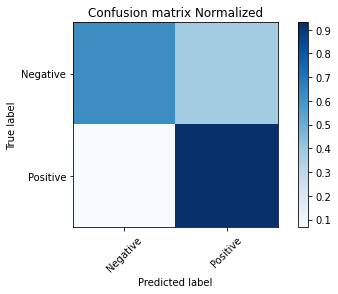

In [626]:
logreg = linear_model.LogisticRegression(n_jobs=1, C=1e5)
logreg = logreg.fit(X_train_word_average_50d, train_data['Sentiment'])
predicted = logreg.predict(X_test_word_average_50d)
evaluate_prediction(predicted, test_data["Sentiment"])

#### Pretrained Wikipedia Embedding

In [ ]:
X_train_word_average_wiki = word_averaging_list(wiki_vectors, train_tokenized)
X_test_word_average_wiki = word_averaging_list(wiki_vectors, test_tokenized)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning:

Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.wv.vectors_norm instead).



accuracy 0.8422835846179908
confusion matrix
 [[ 865  498]
 [ 433 4107]]
(row=expected, col=predicted)


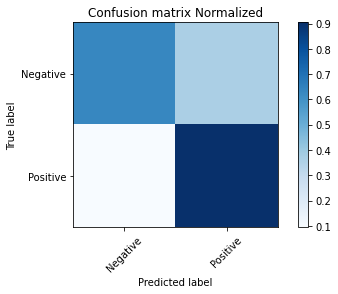

In [ ]:
knn_naive = KNeighborsClassifier(n_neighbors=8, n_jobs=1, algorithm='brute', metric='cosine')
knn_naive.fit(X_train_word_average_wiki, train_data["Sentiment"])
predicted = knn_naive.predict(X_test_word_average_wiki)
evaluate_prediction(predicted, test_data["Sentiment"])

#### Pretrained Twitter Embedding

In [ ]:
X_train_word_average_twitter = word_averaging_list(twitter_vectors, train_tokenized)
X_test_word_average_twitter = word_averaging_list(twitter_vectors, test_tokenized)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning:

Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.wv.vectors_norm instead).



accuracy 0.8414365576825343
confusion matrix
 [[ 911  452]
 [ 484 4056]]
(row=expected, col=predicted)


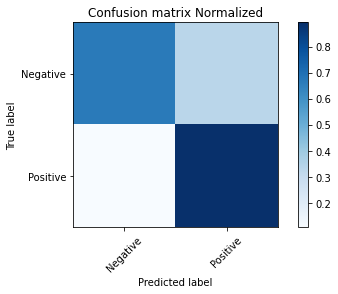

In [ ]:
knn_naive = KNeighborsClassifier(n_neighbors=8, n_jobs=1, algorithm='brute', metric='cosine')
knn_naive.fit(X_train_word_average_twitter, train_data["Sentiment"])
predicted = knn_naive.predict(X_test_word_average_twitter)
evaluate_prediction(predicted, test_data["Sentiment"])